<a href="https://colab.research.google.com/github/cassiodatacyber/Ci-ncia-de-Dados/blob/main/Projeto_Elabora%C3%A7%C3%A3o_de_uma_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from absl import logging

# Silencia logs do TensorFlow
tf.get_logger().setLevel('ERROR')
logging.set_verbosity(logging.ERROR)

# Dados do XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Modelo simples para XOR
model = K.models.Sequential([
    K.layers.Dense(4, activation='tanh', input_shape=(2,)),
    K.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treinamento
hist = model.fit(X, y, epochs=5000, batch_size=4, shuffle=True, verbose=0)

# Avaliação
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Acurácia final: {accuracy*100:.2f}%")

# Histórico de treino
history_df = pd.DataFrame(hist.history)
print(history_df.head())

# Previsões
pred = model.predict(X)
for i in range(len(X)):
    print(f"Entrada: {X[i]} → Esperado: {y[i][0]} | Previsto: {round(pred[i][0])} ({pred[i][0]:.4f})")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia final: 100.00%
   accuracy      loss
0      0.75  0.711642
1      0.50  0.711357
2      0.50  0.711073
3      0.50  0.710791
4      0.50  0.710510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Entrada: [0 0] → Esperado: 0 | Previsto: 0 (0.0040)
Entrada: [0 1] → Esperado: 1 | Previsto: 1 (0.9975)
Entrada: [1 0] → Esperado: 1 | Previsto: 1 (0.9776)
Entrada: [1 1] → Esperado: 0 | Previsto: 0 (0.0221)


# Toy set - XOR Gate

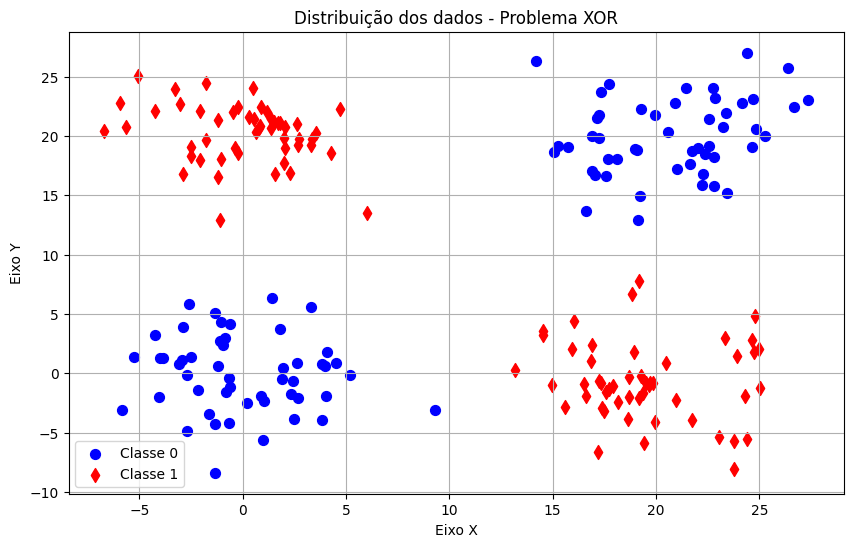

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# metadados
N = 200
MEAN = 10
STD = 3
OFFSET = 10

# Centros das 4 regiões XOR
centers = [
    [MEAN, MEAN],    # 0
    [-MEAN, -MEAN],  # 0
    [MEAN, -MEAN],   # 1
    [-MEAN, MEAN],   # 1
]

data = []
targets = []

# Geração dos dados
for center in centers:
    x = np.random.normal(loc=center, scale=STD, size=(N//4, 2))
    target = int(np.sign(center[0]) != np.sign(center[1]))  # XOR da posição
    data.append(x + OFFSET)  # Cria assimetria nos dados
    targets.append(np.ones((N//4,)) * target)

# Empacotamento
X = np.concatenate(data, axis=0)
y = np.concatenate(targets, axis=0)

# Visualização
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=50, marker='o', c='blue', label='Classe 0')
plt.scatter(X[y==1, 0], X[y==1, 1], s=50, marker='d', c='red', label='Classe 1')
plt.title('Distribuição dos dados - Problema XOR')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.show()


# MLP1 - Baseline

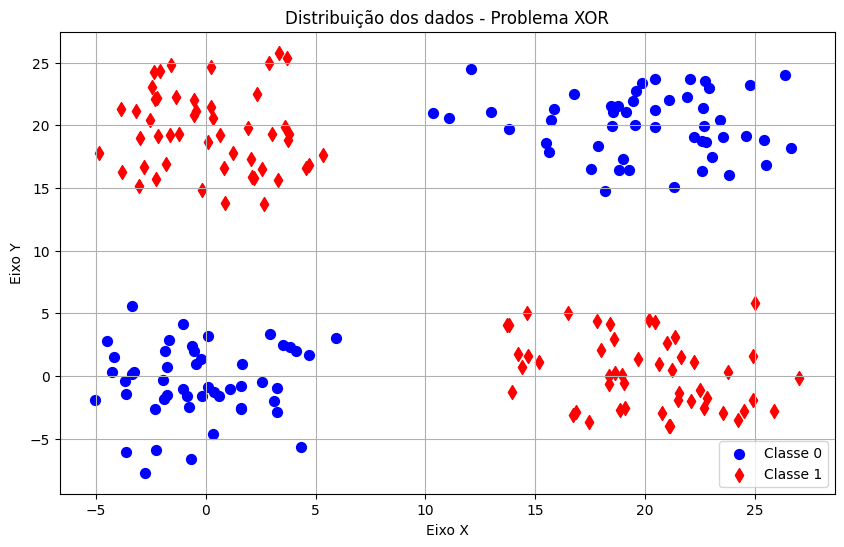

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)


Acurácia final: 100.00%


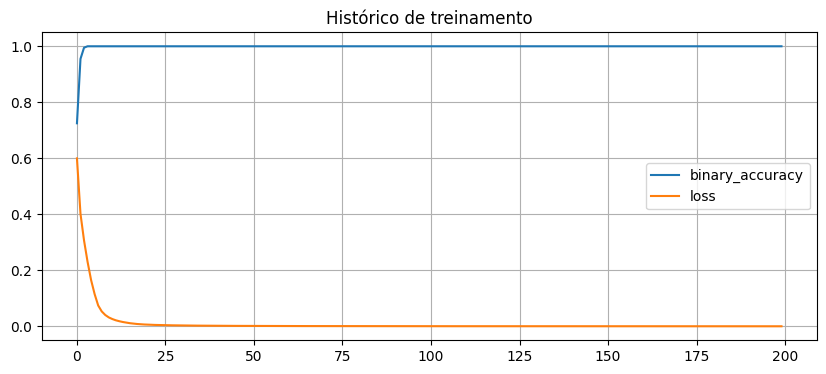

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Entrada: [21.12293605 22.02470738], Real: 0, Previsto: 0.0
Entrada: [15.50897248 18.55685595], Real: 0, Previsto: 0.0
Entrada: [19.28677709 16.44993132], Real: 0, Previsto: 0.0
Entrada: [12.0899576  24.46005289], Real: 0, Previsto: 0.0
Entrada: [20.44336387 21.1821966 ], Real: 0, Previsto: 0.0
Entrada: [18.99622262 17.27168157], Real: 0, Previsto: 0.0
Entrada: [15.87933648 21.32045613], Real: 0, Previsto: 0.0
Entrada: [17.84951021 18.32478079], Real: 0, Previsto: 0.0
Entrada: [20.4636903  19.84241459], Real: 0, Previsto: 0.0
Entrada: [17.54380417 16.52909009], Real: 0, Previsto: 0.0


In [4]:
# Imports principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers
import importlib

# Silencia logs do TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# ---------------------
# 1. Gerando os dados XOR
# ---------------------
N = 200
MEAN = 10
STD = 3
OFFSET = 10

centers = [
    [MEAN, MEAN],    # Classe 0
    [-MEAN, -MEAN],  # Classe 0
    [MEAN, -MEAN],   # Classe 1
    [-MEAN, MEAN],   # Classe 1
]

data = []
targets = []

for center in centers:
    x = np.random.normal(loc=center, scale=STD, size=(N//4, 2))
    target = int(np.sign(center[0]) != np.sign(center[1]))  # lógica XOR
    data.append(x + OFFSET)
    targets.append(np.ones((N//4,)) * target)

X = np.concatenate(data, axis=0)
y = np.concatenate(targets, axis=0)

# ---------------------
# 2. Visualização
# ---------------------
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=50, marker='o', c='blue', label='Classe 0')
plt.scatter(X[y==1, 0], X[y==1, 1], s=50, marker='d', c='red', label='Classe 1')
plt.title('Distribuição dos dados - Problema XOR')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------
# 3. Construção do Modelo
# ---------------------
model = K.Sequential([
    layers.Dense(8, activation='tanh', input_shape=(2,)),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='sigmoid')  # saída binária
])

model.summary()

# ---------------------
# 4. Compilação e Treinamento
# ---------------------
model.compile(
    optimizer=K.optimizers.Adam(learning_rate=0.01),
    loss=K.losses.BinaryCrossentropy(),
    metrics=[K.metrics.BinaryAccuracy()]
)

hist = model.fit(
    X, y,
    epochs=200,
    batch_size=16,
    shuffle=True,
    verbose=0
)

# ---------------------
# 5. Avaliação e visualização
# ---------------------
loss, acc = model.evaluate(X, y, verbose=0)
print(f'\nAcurácia final: {acc*100:.2f}%')

# Histórico de treino
history_df = pd.DataFrame(hist.history)
history_df.plot(figsize=(10, 4), title='Histórico de treinamento')
plt.grid(True)
plt.show()

# Previsões
preds = model.predict(X)
for i in range(10):
    print(f"Entrada: {X[i]}, Real: {int(y[i])}, Previsto: {round(preds[i][0], 2)}")


Dica: Explore o site do keras para conhecer diferentes funções de perda, otimizadores, e métricas

- otimizadores: [keras optimizers](https://keras.io/api/optimizers/)
- losses: [keras losses](https://keras.io/api/losses/)
- métricas: [keras metrics](https://keras.io/api/metrics/)


exemplo de uso:
```python
model.compile(
    optimizer=K.optimizers.SGD(learning_rate=1),
    loss=K.losses.MeanAbsoluteError(),
    metrics=[K.metrics.Accuracy()]
)
```

Se possível, explore outros!


In [5]:
model.compile(
    optimizer=K.optimizers.Adam(learning_rate=0.01),  # otimizador Adam com taxa de aprendizado
    loss=K.losses.BinaryCrossentropy(),               # função de perda para classificação binária
    metrics=[K.metrics.BinaryAccuracy()]              # métrica de acurácia binária
)

hist = model.fit(
    X, y,
    epochs=200,           # número de épocas de treinamento
    batch_size=16,        # tamanho do batch
    shuffle=True          # embaralhar os dados a cada época
)

# Visualizando o histórico de treinamento
history_df = pd.DataFrame(hist.history)
history_df.head()


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 1.0000 - loss: 1.0681e-04
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 5.8669e-05 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 3.3283e-05 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 2.4253e-05 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 1.8533e-05 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 1.4417e-05 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 1.2203e-05 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 1.0304e-05 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 8.8130e-06 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 1.0000 - loss: 7.5932e-06 
Epoch 11/200
13/13 ━━━━━━━━━━━

,binary_accuracy,loss
0,1.0,0.000095
1,1.0,0.000051
2,1.0,0.000032
3,1.0,0.000023
4,1.0,0.000017


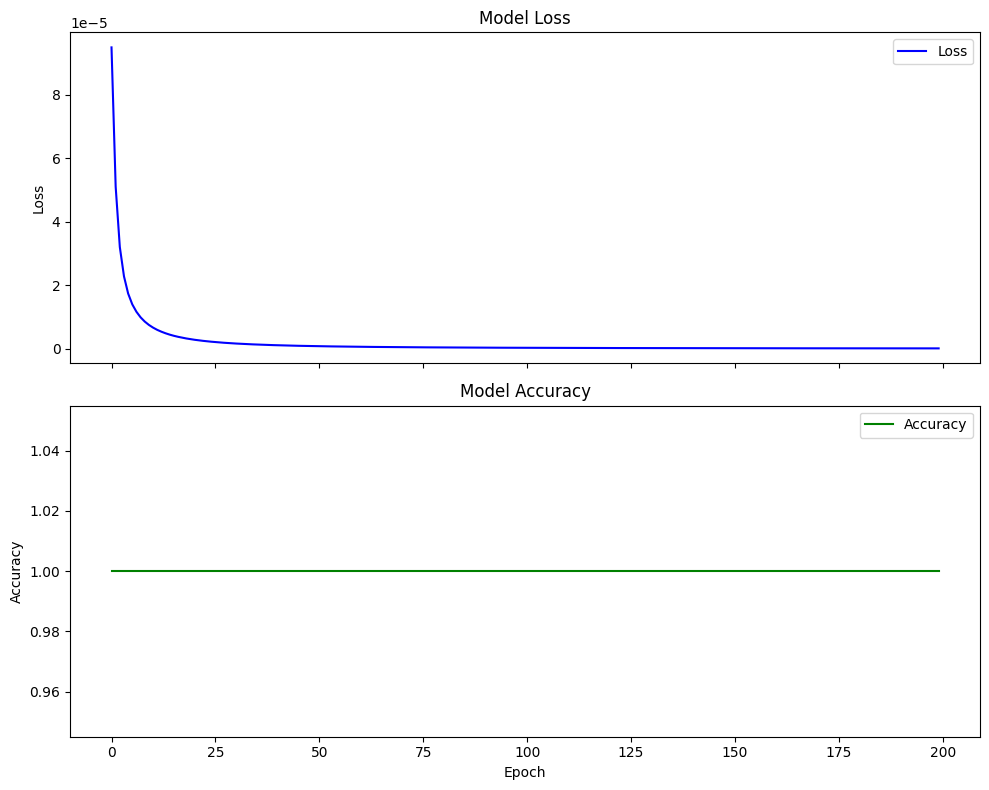

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot loss
axes[0].plot(history_df.index, history_df['loss'], label='Loss', color='blue')
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot accuracy
axes[1].plot(history_df.index, history_df['binary_accuracy'], label='Accuracy', color='green')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


In [12]:
y_pred = model.predict(X)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [15]:
y_pred_classes = (y_pred > 0.5).astype(int)


In [16]:
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Esperado: {int(y[i])}, Previsto: {y_pred_classes[i][0]} ({y_pred[i][0]:.4f})")


Entrada: [21.12293605 22.02470738], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [15.50897248 18.55685595], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [19.28677709 16.44993132], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [12.0899576  24.46005289], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [20.44336387 21.1821966 ], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [18.99622262 17.27168157], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [15.87933648 21.32045613], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [17.84951021 18.32478079], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [20.4636903  19.84241459], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [17.54380417 16.52909009], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [23.82037943 16.03331597], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [10.3492694 20.9995962], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [23.41022817 20.39888775], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [26.40047867 24.01347669], Esperado: 0, Previsto: 0 (0.0000)
Entrada: [22.78221389 

# MLP2 - Exploração do Problema

- Explore novas configurações de modelo livremente.
- Explore reconfigurar as features A e B livremente.
- Explore diferentes taxas de aprendizado.
- Explore diferentes batch sizes.
- Explore diferentes números de épocas.

*Objetivos:*
- Top1: Alcançar o melhor resultado possível.
- Top2: Alcançar o menor modelo possível.
- Top3: Alcançar o menor número de épocas possível.

In [ ]:
importlib.reload(models)

model = ...

model.summary()
K.utils.plot_model(model, show_shapes=True, show_layer_names=True)

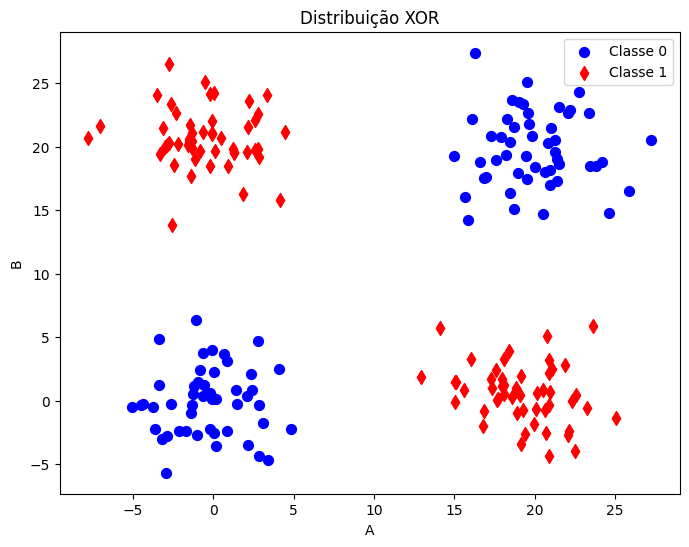

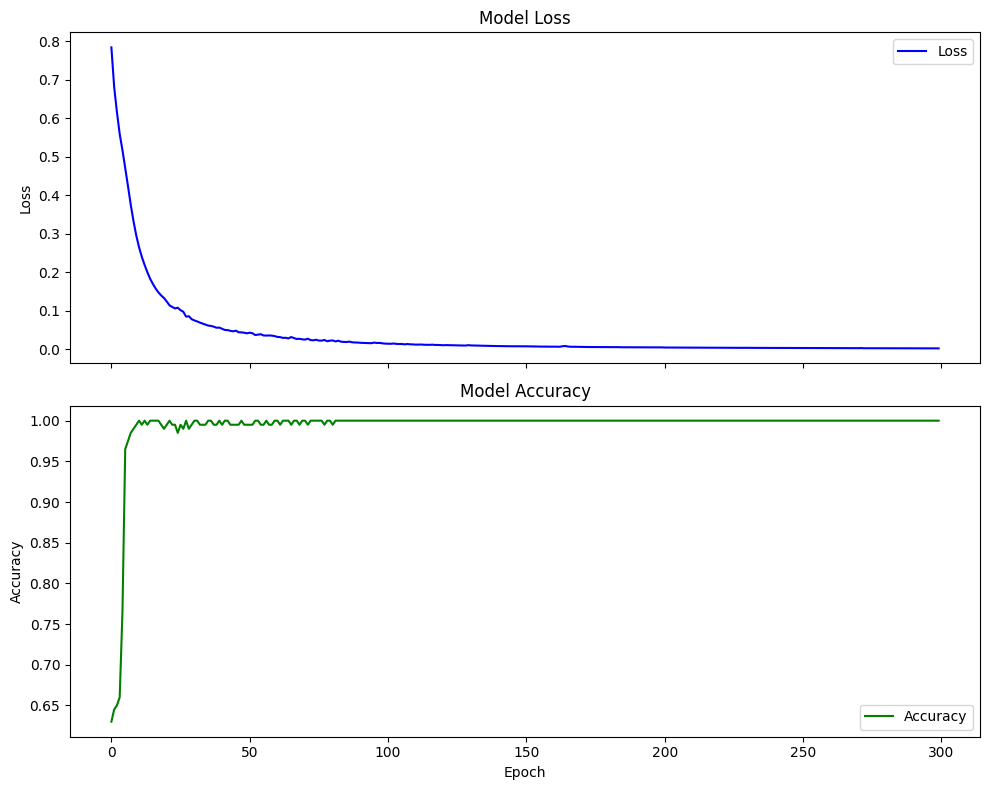

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Entrada: [19.63765937 21.767629  ], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [19.49816069 17.46645201], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [22.04207354 22.67302304], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [18.7246814 21.552985 ], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [18.46923419 16.37541479], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [22.78384034 24.27458453], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [16.09398669 22.15779444], Esperado: 0, Previsto: 0 (0.0018)
Entrada: [20.61192337 18.03199071], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [22.21679117 22.93041451], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [18.97348355 17.90488634], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [18.19170551 19.36691843], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [21.35776753 19.01593052], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [15.87510071 14.242166  ], Esperado: 0, Previsto: 0 (0.0017)
Entrada: [16.98104791 17.58494911], Esperado: 0, Previ

In [17]:
import tensorflow as tf
from tensorflow import keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from absl import logging

tf.get_logger().setLevel('ERROR')
logging.set_verbosity(logging.ERROR)

# Geração dos dados (XOR com 4 centros gaussianos)
N = 200
MEAN = 10
STD = 3
OFFSET = 10

centers = [
    [MEAN, MEAN],
    [-MEAN, -MEAN],
    [MEAN, -MEAN],
    [-MEAN, MEAN],
]

data = []
targets = []

for center in centers:
    x = np.random.normal(loc=center, scale=STD, size=(N//4, 2))
    target = 1 if np.mean(center) == 0 else 0
    data.append(x + OFFSET)
    targets.append(np.ones((N//4,)) * target)

X = np.concatenate(data, axis=0)
y = np.concatenate(targets, axis=0)

# Visualização dos dados
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=50, marker='o', c='blue', label='Classe 0')
plt.scatter(X[y==1, 0], X[y==1, 1], s=50, marker='d', c='red', label='Classe 1')
plt.title('Distribuição XOR')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show()

# Construção do modelo MLP otimizado
model = K.models.Sequential([
    K.layers.Input(shape=(2,)),
    K.layers.Dense(4, activation='tanh'),  # camada oculta mínima
    K.layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo
model.compile(
    optimizer=K.optimizers.Adam(learning_rate=0.01),
    loss=K.losses.BinaryCrossentropy(),
    metrics=[K.metrics.BinaryAccuracy()]
)

# Treinamento
hist = model.fit(
    X, y,
    epochs=300,
    batch_size=16,
    shuffle=True,
    verbose=0
)

# Resultados
history_df = pd.DataFrame(hist.history)

# Visualização de loss e accuracy
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axes[0].plot(history_df.index, history_df['loss'], label='Loss', color='blue')
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_df.index, history_df['binary_accuracy'], label='Accuracy', color='green')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Predições
y_pred = model.predict(X)
y_pred_classes = (y_pred > 0.5).astype(int)

# Impressão de previsões
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Esperado: {int(y[i])}, Previsto: {y_pred_classes[i][0]} ({y_pred[i][0]:.4f})")

# Avaliação final
loss, acc = model.evaluate(X, y, verbose=0)
print(f"\nAcurácia final: {acc*100:.2f}%")


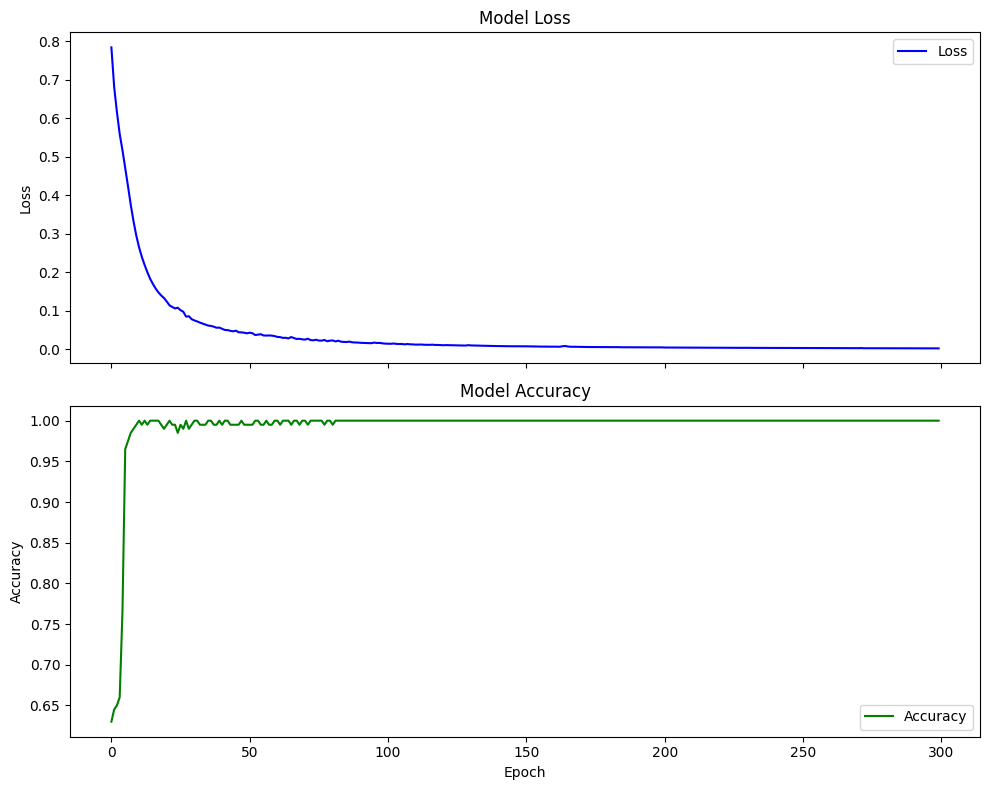

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot loss
axes[0].plot(history_df.index, history_df['loss'], label='Loss', color='blue')
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot accuracy (corrigido)
axes[1].plot(history_df.index, history_df['binary_accuracy'], label='Accuracy', color='green')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


In [19]:
y_pred = model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [24]:
y_pred_classes = (y_pred > 0.5).astype(int)



In [25]:
import matplotlib.pyplot as plt

def scatter_binary(X, y, y_pred):
    plt.figure(figsize=(10, 6))

    # Plotando pontos reais
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Classe 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Classe 1')

    # Plotando os pontos previstos
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], marker='x', c='blue', alpha=0.5, label='Previsto 0')
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], marker='x', c='red', alpha=0.5, label='Previsto 1')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dispersão Binária: Real vs Previsto')
    plt.legend()
    plt.show()
